# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Function-applylut" data-toc-modified-id="Function-applylut-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Function applylut</a></div><div class="lev2 toc-item"><a href="#Synopse" data-toc-modified-id="Synopse-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Synopse</a></div><div class="lev2 toc-item"><a href="#Description" data-toc-modified-id="Description-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Description</a></div><div class="lev2 toc-item"><a href="#Examples" data-toc-modified-id="Examples-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Examples</a></div><div class="lev3 toc-item"><a href="#Example-1" data-toc-modified-id="Example-1-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Example 1</a></div><div class="lev3 toc-item"><a href="#Example-2" data-toc-modified-id="Example-2-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Example 2</a></div><div class="lev3 toc-item"><a href="#Example-3" data-toc-modified-id="Example-3-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Example 3</a></div><div class="lev3 toc-item"><a href="#Example-4" data-toc-modified-id="Example-4-134"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Example 4</a></div><div class="lev2 toc-item"><a href="#Equation" data-toc-modified-id="Equation-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Equation</a></div><div class="lev2 toc-item"><a href="#See-Also:" data-toc-modified-id="See-Also:-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>See Also:</a></div>

# Function applylut

## Synopse

Intensity image transform.

- **g = applylut(fi, it)**

  - **g**: Image. 

  - **fi**: Image. input image, gray scale or index image.
  - **it**: Image. Intensity transform. Table of one or three columns.

In [ ]:
import numpy as np

def applylut(fi, it):
    g = it[fi]
    if len(g.shape) == 3:
        g = np.swapaxes(g, 0,2)
        g = np.swapaxes(g, 1,2)
    return g

## Description

Apply an intensity image transform to the input image. The input image can be seen as an gray scale 
image or an index image. The intensity transform is represented by a table where the input (gray scale) 
color address the table line and its column contents indicates the output (gray scale) image color. 
The table can have one or three columns. If it has three columns, the output image is a three color 
band image. This intensity image transformation is very powerful and can be use in many applications 
involving gray scale and color images. If the input image has an index (gray scale color) that is greater 
than the size of the intensity table, an error is reported.

## Examples

In [1]:
testing = (__name__ == "__main__")

if testing:
    import numpy as np
    import sys,os
    import matplotlib.image as mpimg
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia


### Example 1

This first example shows a simple numeric 2 lines, 3 columns image with sequential pixel values. First the identity
table is applied and image g is generated with same values of f. Next, a new table, itn = 5 - it is generated creating
a negation table. The resultant image gn has the values of f negated. 

In [2]:
if testing:    
    
    f = np.array([[0,1,2],
                  [3,4,5]])
    print('f=\n',f)
    it = np.array(list(range(6))) # identity transform
    print('it=',it)
    g = ia.applylut(f, it)
    print('g=\n',g)
    itn = 5 - it  # negation
    print('itn=',itn)
    gn = ia.applylut(f, itn)
    print('gn=\n',gn)

f=
 [[0 1 2]
 [3 4 5]]
it= [0 1 2 3 4 5]
g=
 [[0 1 2]
 [3 4 5]]
itn= [5 4 3 2 1 0]
gn=
 [[5 4 3]
 [2 1 0]]


### Example 2

This example shows the negation operation applying the intensity transform through a negation grayscale table: it = 255 - i.

""
f

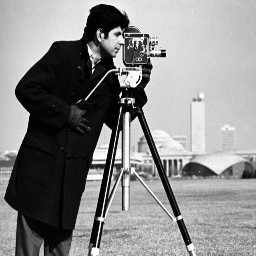

""
g

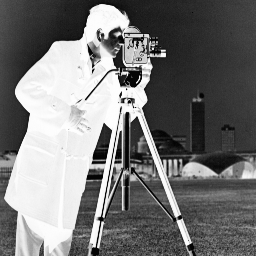

In [5]:
if testing:
    f = mpimg.imread('../data/cameraman.tif')
    it = (255 - np.arange(256)).astype('uint8')
    g = ia.applylut(f, it)
    ia.adshow(f,'f')
    ia.adshow(g,'g')

### Example 3

In this example, the colortable has 3 columns and the application of the colortable to an scalar image results in an image with 3 bands.

In [7]:
if testing:
    f = np.array([[0,1,2], 
                  [2,0,1]])
    ct = np.array([[100,101,102],
                   [110,111,112],
                   [120,121,122]])
    #print iaimginfo(ct)
    g = ia.applylut(f,ct)
    print(g)

[[[100 110 120]
  [120 100 110]]

 [[101 111 121]
  [121 101 111]]

 [[102 112 122]
  [122 102 112]]]


### Example 4

In this example, the colortable has 3 columns, R, G and B, where G and B are zeros and R is identity.

(256, 1) uint8
(256, 3) uint8
(256, 256, 3) uint8


""
""

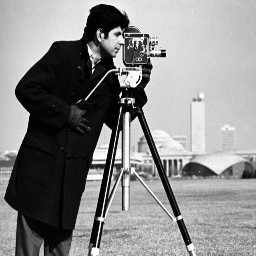

""
""

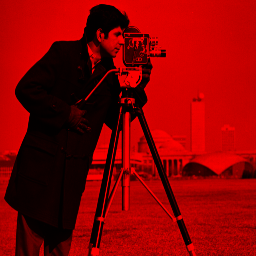

In [18]:
if testing:
    f = mpimg.imread('../data/cameraman.tif')
    aux = np.resize(np.arange(256).astype('uint8'), (256,1))
    ct = np.concatenate((aux, np.zeros((256,2),'uint8')), 1)
    g = ia.applylut(f, ct) # generate (bands,H,W)
    g = g.transpose(1,2,0) # convert to (H,W,bands)
    ia.adshow(f)
    ia.adshow(g)

## Equation

$$    g(r,c) = IT( f(r,c) ) $$


$$
    g_{R}(r,c) = IT_R( f(r,c))\\
    g_{G}(r,c) = IT_G( f(r,c))\\
    g_{B}(r,c) = IT_B( f(r,c))    $$

## See Also:

- [ia636:colormap](colormap.ipnb) Pseudocolor maps

In [32]:
if testing:
    print('testing applylut')
    print(repr(ia.applylut(np.array([0,1,2,3]),np.array([0,1,2,3]))) == repr(np.array([0,1,2,3])))
    print(repr(ia.applylut(np.array([0,1,2,3]),np.array([[0,0,0],[1,1,1],[2,2,2],[3,3,3]]))) == repr(np.array([[0,0,0], [1,1,1], [2,2,2],[3,3,3]])))

testing applylut
True
True
